In [8]:
import time
import cv2
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import math

In [9]:
def estimate_area(corners):
    """Estimates area of a detected ArUco marker.

    Parameters
    ----------
    corner : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """
    list_cX, list_cY, list_areas = list(), list(), list()
    for i in range(len(corners)):
        corner = corners[i].reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corner
        width = abs(topRight[0] - topLeft[0])
        height = abs(topRight[1] - bottomRight[1])
        cX = int((topLeft[0] + bottomRight[0]) / 2.0)
        cY = int((topLeft[1] + bottomRight[1]) / 2.0)
        list_cX.append(cX)
        list_cY.append(cY)
        list_areas.append(width*height)

    return (list_cX, list_cY, list_areas)

In [10]:
def is_rotation_matrix(R):
    """Checks if a matrix is a valid rotation matrix.

    Parameters
    ----------
    R : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype=R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

In [11]:
def rotation_matrix_to_euler_angles(R):
    """Calculates rotation matrix to euler angles. The result is the same as MATLAB except the order
    of the euler angles ( x and z are swapped ).

    Parameters
    ----------
    R : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """
    assert(is_rotation_matrix(R))

    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6

    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0

    return np.array([x, y, z])

In [12]:
# det = Detection(aruco_dict='DICT_5X5_100', calibration_filename='../calibrations/calibration_l.pckl')
from laruco.detect import Detection
det = Detection(aruco_dict='DICT_5X5_100', calibration_filename='../calibrations/calibration_l.pckl')

In [20]:
marker_size = 4.3
# marker_size = 1.4
capture_channel = 0
cap = cv2.VideoCapture(capture_channel)
resolution = (640, 480)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
path_to_save_video = './test_notebook.avi'
out = cv2.VideoWriter(path_to_save_video, fourcc, 30.0, resolution)
while True:
    frame_read, frame = cap.read()
    
#     _, _, _, detected_frame = det.detect_area(frame=frame, draw_annotations=True)
    # _, _, detected_frame = det._detect_pose(frame, marker_size)
#     rvec_all, tvec_all, detected_frame = det.detect_distance(frame, marker_size, draw_annotations=True)
    
#     x, y, direction, detected_frame = det.detect_angles(frame, marker_size, draw_annotations=True)
#     c,i,r, detected_frame = det.detect_marker(frame=frame, draw_annotations=True)
    r,t,detected_frame = det.detect_distance(frame=frame, marker_size=marker_size, draw_annotations=True)
#     try:
#         print(i[0][0])
#     except:
#         pass
    
    cv2.imshow('Video stream', detected_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    out.write(detected_frame)
    
    
cap.release()
cv2.destroyAllWindows()
out.release()        

In [35]:
# corners_list, ids_list, rejected_list = det.detect_images(path_to_raw_frames='../images/', path_to_detected_frames='./', headless=False )

In [20]:
frame = cv2.imread('../images/image_3.png')
corners, ids, rejected = det.detect_marker(frame=frame)

In [38]:
frame.shape

(480, 640, 3)

In [30]:
list_cX, list_cY, list_areas, detected_frame = det.detect_area(frame=frame, draw_annotations=True)

In [31]:
cv2.imshow('ArUco detection', detected_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

[17161.0]

In [7]:
list_cX, list_cY, list_areas, detected_frame =  det.detect_area(frame=frame)
#list_cX, list_cY, list_areas = det._detect_marker_area(frame=frame)

In [8]:
# create frames

def create_frames():
    capture_channel = 0
    cap = cv2.VideoCapture(capture_channel)
    resolution = (640, 480)
    i = 1
    while True:
        time.sleep(2)
        frame_read, frame = cap.read()
        cv2.imwrite('../images/image_{}.png'.format(i), frame)
        i += 1

In [9]:
create_frames()

KeyboardInterrupt: 

In [23]:
list_cX, list_cY, list_areas = det._detect_marker_area(frame=frame)

In [26]:
list_cY

[54, 299]

In [2]:
from ocontrol.AFLController import Controller 
from ocontrol.utils import convert_to_polar_coordinate, differential_agv_wheel_control
from scipy.interpolate import interp1d

In [3]:
controller = Controller()

In [4]:
y = [0, 0.07,  0.07,  0.1,  0.1,  0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.7] # motor power
z = [19.19, 18.32, 9.50, 9.45, 9.27, 3.84, 3.90, 3.92, 2.53, 2.50, 2.56, 1.55, 1.60, 1.62, 1.3]
x = [0, 0.052, 0.054 ,0.105 ,0.105,0.107,0.26, 0.25, 0.255, 0.39, 0.4, 0.39, 0.645, 0.625,   0.617,   0.77] #m/s

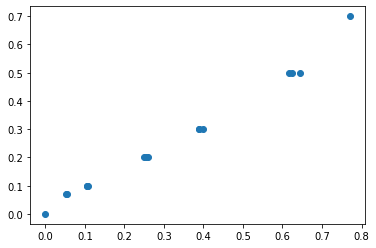

In [5]:
plt.scatter(x,y)

In [6]:
# f - function between m/s and power of a motor
f = interp1d(x, y)

In [7]:
from arucoit.detect import Detection
detector = Detection('DICT_5X5_100', calibration_filename='./calibrations/calibration_l.pckl')

In [8]:
from arucoit.utils import draw_detected_markers, estimate_area

In [9]:
def draw_cx_cy_area(cX, cY, area, frame):
    try:
        for i in range(len(cX[0])):    
            try:
                cv2.putText(frame, 'Area= ' + str(int(area[0][i])), (20, 405 + i*25), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.circle(frame, (cX[0][i], cY[0][i]), 4, (0, 0, 255), -1)
            except:
                pass
    except:
        pass
    return frame

In [10]:
mark_s = 4.3
capture_channel = 0
cap = cv2.VideoCapture(capture_channel)
resolution = (640, 480)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
path_to_save_video = './videos/test_notebook.avi'
out = cv2.VideoWriter(path_to_save_video, fourcc, 30.0, resolution)
while True:
    frame_read, frame = cap.read()
    x, y, direction, frame = detector.detect_angles(frame=frame, marker_size=4.3)
    rou, alpha, theta_relative = convert_to_polar_coordinate(x, y, direction, 0, 0, 0)
    if rou and alpha and theta_relative:
        agv_v, agv_omega = controller.execute(rou, alpha, theta_relative)
        l, r = differential_agv_wheel_control(agv_v=agv_v, agv_omega=agv_omega, d=0.12 , r=0.032)
        if l < 0 or r < 0:
            p_l = -1*f(abs(l))
            p_r = -1*f(abs(r))
        else:
            p_l = f(l)
            p_r = f(r)
            
    else:
        agv_v, agv_omega, l, r, p_l, p_r = None, None, None, None, None, None
        
#     print(x,y,direction)
#     print(rou,alpha,theta_relative)
    print('Agv v, agv omega', agv_v, agv_omega)
    print('linear left, linear right', l, r)
    print('power left, power right', p_l, p_r)
    print('---------')
    #time.sleep(2)
    
    
#    cX, cY, area, frame = detector.detect_area(frame=frame, marker_size=1.4)
#     x, y, direction, frame = detector.detect_angles(frame=frame, marker_size=4.3)
    # output_image = draw_cx_cy_area(cX, cY, area, frame)
    # print(direction)
#     r, t, frame = detector.detect_distance(frame=frame, marker_size=1.4)
#     print('Rot: ', r)
#     try:
#         print(len(r))
#     except:
#         pass
#     print('Tran: ', t)
#     print('-----')

#     c, i, rej = detector.detect_marker(frame=frame, marker_size=4.3)
#     frame = draw_detected_markers(frame, c)
#     try:
#         print('-----')
#         print('Corners')
#         print(type(c))
#         print(len(c))
#         print(c)
#         print('IDs')
#         print(type(i))
#         print(len(i))
#         print(i)
#         print('Rej')
#         print(type(rej))
#         print(len(rej))
#         print(rej)
        
#     except:
#         pass
#     print(estimate_area(c))
          
    
        
    
    cv2.imshow('Video stream', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#     time.sleep(3)
    out.write(frame)
    
cap.release()
cv2.destroyAllWindows()
out.release()        

Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear left, linear right None None
power left, power right None None
---------
Agv v, agv omega None None
linear lef

stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.02291555336499678 0.030606503557650083
---------
stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.02291555336499678 0.030606503557650083
---------
stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.02291555336499678 0.030606503557650083
---------
stage 1
Agv v, agv omega 0.019852468197383663 -0.05270481960237616
linear left, linear right 0.01669017902124109 0.023014757373526235
power left, power right 0.02246754868243993 0.030981404156669935
---------
stage 1
Agv v, agv omega 0.018244060380839217 0.18464565198053717
linear left, linear right 0.029322799499671447 0.007165321262006989
power left, power right 0.0

stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.02291555336499678 0.030606503557650083
---------
stage 1
Agv v, agv omega 0.019852468197383663 -0.05270481960237616
linear left, linear right 0.01669017902124109 0.023014757373526235
power left, power right 0.02246754868243993 0.030981404156669935
---------
stage 1
Agv v, agv omega 0.019852468197383663 -0.05270481960237616
linear left, linear right 0.01669017902124109 0.023014757373526235
power left, power right 0.02246754868243993 0.030981404156669935
---------
stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.02291555336499678 0.030606503557650083
---------
stage 1
Agv v, agv omega 0.019879621142697403 -0.04761064404975853
linear left, linear right 0.017022982499711892 0.022736259785682916
power left, power right 0.0

stage 1
Agv v, agv omega 0.019881332333591677 -0.04729655830990946
linear left, linear right 0.01704353883499711 0.022719125832186243
power left, power right 0.022943225354803806 0.030583438620250713
---------
stage 1
Agv v, agv omega 0.019881332333591677 -0.04729655830990946
linear left, linear right 0.01704353883499711 0.022719125832186243
power left, power right 0.022943225354803806 0.030583438620250713
---------
stage 1
Agv v, agv omega 0.019999778947731323 -0.002036080840011144
linear left, linear right 0.019877614097330656 0.02012194379813199
power left, power right 0.02675832666948358 0.02708723203594691
---------
stage 1
Agv v, agv omega 0.019999778947731323 -0.002036080840011144
linear left, linear right 0.019877614097330656 0.02012194379813199
power left, power right 0.02675832666948358 0.02708723203594691
---------
stage 1
Agv v, agv omega 0.019999778947731323 -0.002036080840011144
linear left, linear right 0.019877614097330656 0.02012194379813199
power left, power right 0.0

stage 1
Agv v, agv omega 0.01990333013368851 -0.042655370127973616
linear left, linear right 0.017344007926010093 0.022462652341366924
power left, power right 0.02334770297732128 0.030238185844147784
---------
stage 1
Agv v, agv omega 0.01990333013368851 -0.042655370127973616
linear left, linear right 0.017344007926010093 0.022462652341366924
power left, power right 0.02334770297732128 0.030238185844147784
---------
stage 1
Agv v, agv omega 0.01990333013368851 -0.042655370127973616
linear left, linear right 0.017344007926010093 0.022462652341366924
power left, power right 0.02334770297732128 0.030238185844147784
---------
stage 1
Agv v, agv omega 0.01990333013368851 -0.042655370127973616
linear left, linear right 0.017344007926010093 0.022462652341366924
power left, power right 0.02334770297732128 0.030238185844147784
---------
stage 1
Agv v, agv omega 0.01990333013368851 -0.042655370127973616
linear left, linear right 0.017344007926010093 0.022462652341366924
power left, power right 0

stage 1
Agv v, agv omega 0.01999993009209913 0.0011449957325840524
linear left, linear right 0.02006862983605417 0.019931230348144088
power left, power right 0.027015463240842155 0.026830502391732427
---------
stage 1
Agv v, agv omega 0.019999983712376695 -0.0005526627431556879
linear left, linear right 0.019966823947787354 0.020033143476966036
power left, power right 0.02687841685279067 0.026967693142069666
---------
stage 1
Agv v, agv omega 0.019999983712376695 -0.0005526627431556879
linear left, linear right 0.019966823947787354 0.020033143476966036
power left, power right 0.02687841685279067 0.026967693142069666
---------
stage 1
Agv v, agv omega 0.019999947843180432 -0.0009890268578484885
linear left, linear right 0.019940606231709523 0.020059289454651342
power left, power right 0.02684312377345513 0.027002889650492194
---------
stage 1
Agv v, agv omega 0.01999993009209913 0.0011449957325840524
linear left, linear right 0.02006862983605417 0.019931230348144088
power left, power ri

power left, power right 0.03272974305701534 0.02026758531426277
---------
stage 1
Agv v, agv omega 0.012980593126678295 0.3200527515139292
linear left, linear right 0.03218375821751404 -0.006222571964157455
power left, power right -0.04332428990819198 -0.008376539182519651
---------
stage 1
Agv v, agv omega 0.012980593126678295 0.3200527515139292
linear left, linear right 0.03218375821751404 -0.006222571964157455
power left, power right -0.04332428990819198 -0.008376539182519651
---------
stage 1
Agv v, agv omega 0.019943205953167027 -0.0331056957641618
linear left, linear right 0.01795686420731732 0.021929547699016734
power left, power right 0.024172701817542545 0.029520544979445607
---------
stage 1
Agv v, agv omega 0.019943205953167027 -0.0331056957641618
linear left, linear right 0.01795686420731732 0.021929547699016734
power left, power right 0.024172701817542545 0.029520544979445607
---------
stage 1
Agv v, agv omega 0.01989388650990923 -0.04483661706734363
linear left, linear ri

theta_relative -1.0094165248659803 prev_theta -1.0094165248659803
agv_omega -0.10094165248659803
stage 2
Agv v, agv omega 0 -0.10094165248659803
linear left, linear right -0.006056499149195882 0.006056499149195882
power left, power right -0.008152979623917533 -0.008152979623917533
---------
delta_t 0.035204410552978516
theta_relative -0.5204973086527874 prev_theta -1.0094165248659803
agv_omega 0.08683037209154443
stage 2
Agv v, agv omega 0 0.08683037209154443
linear left, linear right 0.005209822325492665 -0.005209822325492665
power left, power right -0.007013222361240127 -0.007013222361240127
---------
delta_t 0.03547096252441406
theta_relative 1.1882833057818887 prev_theta -0.5204973086527874
agv_omega 0.6005690257337126
stage 2
Agv v, agv omega 0 0.6005690257337126
linear left, linear right 0.03603414154402276 -0.03603414154402276
power left, power right -0.04850749823233834 -0.04850749823233834
---------
delta_t 0.031603336334228516
theta_relative 1.1882833057818887 prev_theta 1.18

linear left, linear right -0.008367666734319306 0.008367666734319306
power left, power right -0.011264166757737528 -0.011264166757737528
---------
delta_t 0.033727169036865234
theta_relative 0.5622709029137407 prev_theta -1.3600712575759148
agv_omega 0.6261955209024502
stage 2
Agv v, agv omega 0 0.6261955209024502
linear left, linear right 0.03757173125414701 -0.03757173125414701
power left, power right -0.05057733053442868 -0.05057733053442868
---------
delta_t 0.03434920310974121
theta_relative 0.5622709029137407 prev_theta 0.5622709029137407
agv_omega 0.05622709029137407
stage 2
Agv v, agv omega 0 0.05622709029137407
linear left, linear right 0.0033736254174824443 -0.0033736254174824443
power left, power right -0.0045414188312263674 -0.0045414188312263674
---------
delta_t 0.028227567672729492
theta_relative 0.6103190348974148 prev_theta 0.5622709029137407
agv_omega 0.07805360813703674
stage 2
Agv v, agv omega 0 0.07805360813703674
linear left, linear right 0.0046832164882222044 -0.

delta_t 0.055001258850097656
theta_relative 0.5947285047676187 prev_theta 0.9281433040020276
agv_omega -0.001146634641407726
stage 2
Agv v, agv omega 0 -0.001146634641407726
linear left, linear right -6.879807848446356e-05 6.879807848446356e-05
power left, power right -9.26127979598548e-05 -9.26127979598548e-05
---------
delta_t 0.032022953033447266
theta_relative 0.5947285047676187 prev_theta 0.5947285047676187
agv_omega 0.059472850476761874
stage 2
Agv v, agv omega 0 0.059472850476761874
linear left, linear right 0.0035683710286057123 -0.0035683710286057123
power left, power right -0.0048035763846615365 -0.0048035763846615365
---------
delta_t 0.0309603214263916
theta_relative 0.31606232211336055 prev_theta 0.5947285047676187
agv_omega -0.058401290261190314
stage 2
Agv v, agv omega 0 -0.058401290261190314
linear left, linear right -0.0035040774156714187 0.0035040774156714187
power left, power right -0.0047170272903269105 -0.0047170272903269105
---------
delta_t 0.09833669662475586
th

delta_t 0.03299903869628906
theta_relative 0.06136872858202618 prev_theta 0.06136872858202618
agv_omega 0.006136872858202618
stage 2
Agv v, agv omega 0 0.006136872858202618
linear left, linear right 0.0003682123714921571 -0.0003682123714921571
power left, power right -0.0004956705000855961 -0.0004956705000855961
---------
delta_t 0.027001380920410156
theta_relative -1.1904135674717051 prev_theta 0.06136872858202618
agv_omega -0.5826407184774136
stage 2
Agv v, agv omega 0 -0.5826407184774136
linear left, linear right -0.034958443108644814 0.034958443108644814
power left, power right -0.047059442646252635 -0.047059442646252635
---------
delta_t 0.031012296676635742
theta_relative -1.1904135674717051 prev_theta -1.1904135674717051
agv_omega -0.11904135674717052
stage 2
Agv v, agv omega 0 -0.11904135674717052
linear left, linear right -0.007142481404830231 0.007142481404830231
power left, power right -0.009614878814194542 -0.009614878814194542
---------
delta_t 0.02699899673461914
theta_re

theta_relative 0.15672936471887278 prev_theta 0.25803404505996913
agv_omega -0.003085236282946012
stage 2
Agv v, agv omega 0 -0.003085236282946012
linear left, linear right -0.00018511417697676072 0.00018511417697676072
power left, power right -0.00024919216131487023 -0.00024919216131487023
---------
delta_t 0.02899646759033203
theta_relative 0.15672936471887278 prev_theta 0.15672936471887278
agv_omega 0.015672936471887278
stage 2
Agv v, agv omega 0 0.015672936471887278
linear left, linear right 0.0009403761883132367 -0.0009403761883132367
power left, power right -0.0012658910227293571 -0.0012658910227293571
---------
delta_t 0.043009281158447266
theta_relative 0.10123542036926703 prev_theta 0.15672936471887278
agv_omega -0.002779241468141581
stage 2
Agv v, agv omega 0 -0.002779241468141581
linear left, linear right -0.00016675448808849486 0.00016675448808849486
power left, power right -0.0002244771955037431 -0.0002244771955037431
---------
delta_t 0.05899643898010254
theta_relative 0.

power left, power right -0.001325193336256761 -0.001325193336256761
---------
delta_t 0.03129100799560547
theta_relative -0.16407155591750375 prev_theta -0.16407155591750375
agv_omega -0.016407155591750374
stage 2
Agv v, agv omega 0 -0.016407155591750374
linear left, linear right -0.0009844293355050224 0.0009844293355050224
power left, power right -0.001325193336256761 -0.001325193336256761
---------
delta_t 0.026948928833007812
theta_relative -0.16407155591750375 prev_theta -0.16407155591750375
agv_omega -0.016407155591750374
stage 2
Agv v, agv omega 0 -0.016407155591750374
linear left, linear right -0.0009844293355050224 0.0009844293355050224
power left, power right -0.001325193336256761 -0.001325193336256761
---------
delta_t 0.03242826461791992
theta_relative -0.1862307956619771 prev_theta -0.16407155591750375
agv_omega -0.025456389953158135
stage 2
Agv v, agv omega 0 -0.025456389953158135
linear left, linear right -0.0015273833971894881 0.0015273833971894881
power left, power righ

delta_t 0.03402256965637207
theta_relative -0.047307884136191906 prev_theta -0.047307884136191906
agv_omega -0.004730788413619191
stage 2
Agv v, agv omega 0 -0.004730788413619191
linear left, linear right -0.00028384730481715144 0.00028384730481715144
power left, power right -0.0003821021411000116 -0.0003821021411000116
---------
delta_t 0.027224302291870117
theta_relative -1.1904135674717051 prev_theta -0.047307884136191906
agv_omega -0.5389256465557194
stage 2
Agv v, agv omega 0 -0.5389256465557194
linear left, linear right -0.032335538793343166 0.032335538793343166
power left, power right -0.04352860991411581 -0.04352860991411581
---------
delta_t 0.033416748046875
theta_relative -1.1904135674717051 prev_theta -1.1904135674717051
agv_omega -0.11904135674717052
stage 2
Agv v, agv omega 0 -0.11904135674717052
linear left, linear right -0.007142481404830231 0.007142481404830231
power left, power right -0.009614878814194542 -0.009614878814194542
---------
delta_t 0.03036952018737793
the

---------
delta_t 0.03499889373779297
theta_relative 0.33544407335508364 prev_theta 0.33544407335508364
agv_omega 0.03354440733550836
stage 2
Agv v, agv omega 0 0.03354440733550836
linear left, linear right 0.002012664440130502 -0.002012664440130502
power left, power right -0.0027093559770987527 -0.0027093559770987527
---------
delta_t 0.03800177574157715
theta_relative 0.2337467811035409 prev_theta 0.33544407335508364
agv_omega -0.0033865166672566033
stage 2
Agv v, agv omega 0 -0.0033865166672566033
linear left, linear right -0.0002031910000353962 0.0002031910000353962
power left, power right -0.0002735263462014949 -0.0002735263462014949
---------
delta_t 0.02802276611328125
theta_relative 0.2337467811035409 prev_theta 0.2337467811035409
agv_omega 0.023374678110354093
stage 2
Agv v, agv omega 0 0.023374678110354093
linear left, linear right 0.0014024806866212455 -0.0014024806866212455
power left, power right -0.001887954770451677 -0.001887954770451677
---------
delta_t 0.0309798717498

delta_t 0.04305291175842285
theta_relative -1.1904135674717051 prev_theta -1.1904135674717051
agv_omega -0.11904135674717052
stage 2
Agv v, agv omega 0 -0.11904135674717052
linear left, linear right -0.007142481404830231 0.007142481404830231
power left, power right -0.009614878814194542 -0.009614878814194542
---------
delta_t 0.027040958404541016
theta_relative -1.1904135674717051 prev_theta -1.1904135674717051
agv_omega -0.11904135674717052
stage 2
Agv v, agv omega 0 -0.11904135674717052
linear left, linear right -0.007142481404830231 0.007142481404830231
power left, power right -0.009614878814194542 -0.009614878814194542
---------
delta_t 0.030024051666259766
theta_relative -1.1904135674717051 prev_theta -1.1904135674717051
agv_omega -0.11904135674717052
stage 2
Agv v, agv omega 0 -0.11904135674717052
linear left, linear right -0.007142481404830231 0.007142481404830231
power left, power right -0.009614878814194542 -0.009614878814194542
---------
delta_t 0.026999711990356445
theta_rel

Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------
stage 3
Agv v, agv omega 0.02 0
linear left, linear right 0.02 0.02
power left, power right 0.026923076923076925 0.026923076923076925
---------


---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, linear right 0.0 0.0
power left, power right 0.0 0.0
---------
stage 4
Agv v, agv omega 0 0
linear left, lin

In [1]:
from laruco.detect import Detection
from laruco.utils import conv

In [3]:
det = Detection(aruco_dict="DICT_5X5_100", calibration_filename='../calibrations/calibration_l.pckl')

In [ ]:

det.detect_angles(frame,marker_size=2.1)

In [7]:
mark_s = 4.3
capture_channel = 0
cap = cv2.VideoCapture(capture_channel)
resolution = (640, 480)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
path_to_save_video = './videos/test_notebook.avi'
out = cv2.VideoWriter(path_to_save_video, fourcc, 30.0, resolution)
while True:
    frame_read, frame = cap.read()
    x, y, direction, frame = det.detect_angles(frame=frame, marker_size=4.3)
    rou, alpha, theta_relative = convert_to_polar_coordinate(x, y, direction, 0, 0, 0)
    if rou and alpha and theta_relative:
        agv_v, agv_omega = controller.execute(rou, alpha, theta_relative)
        l, r = differential_agv_wheel_control(agv_v=agv_v, agv_omega=agv_omega, d=0.12 , r=0.032)
        if l < 0 or r < 0:
            p_l = -1*f(abs(l))
            p_r = -1*f(abs(r))
        else:
            p_l = f(l)
            p_r = f(r)
            
    else:
        agv_v, agv_omega, l, r, p_l, p_r = None, None, None, None, None, None
        
#     print(x,y,direction)
#     print(rou,alpha,theta_relative)
    print('Agv v, agv omega', agv_v, agv_omega)
    print('linear left, linear right', l, r)
    print('power left, power right', p_l, p_r)
    print('---------')

NameError: name 'convert_to_polar_coordinate' is not defined